In [ ]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Fraud.csv")
df.head()


In [33]:
df.isnull().sum() # Missing values

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
type_CASH_OUT     0
type_DEBIT        0
type_PAYMENT      0
type_TRANSFER     0
dtype: int64

In [35]:
# Check for duplicates
df.duplicated().sum()

np.int64(543)

In [21]:
# Describe to see outliers
df.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<Axes: >

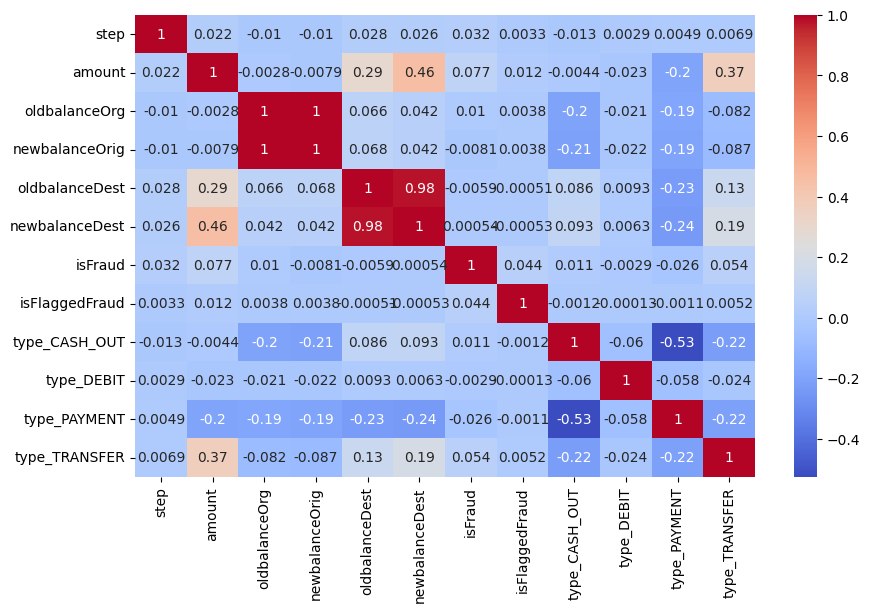

In [32]:

# Correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [30]:
#Use SelectKBest, or analyze correlation
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df['isFraud']

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
scores.sort_values(by='Score', ascending=False)


,Feature,Score
1,amount,37640.657952
9,type_TRANSFER,18517.188953
0,step,6350.771614
8,type_PAYMENT,4204.280956
6,type_CASH_OUT,806.183706
2,oldbalanceOrg,656.131724
3,newbalanceOrig,422.458368
4,oldbalanceDest,220.386451
7,type_DEBIT,53.901831
5,newbalanceDest,1.823504


In [38]:
# Sample only 1% of data
# This is useful for testing on low-memory systems or for faster model training

df_sample = df.sample(frac=0.01, random_state=42)

X = df_sample.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df_sample['isFraud']

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier() #Initialize a Random Forest Classifier
model.fit(X_train, y_train) # Train the model on the training data
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[12712     1]
 [    3    10]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12713
           1       0.91      0.77      0.83        13

    accuracy                           1.00     12726
   macro avg       0.95      0.88      0.92     12726
weighted avg       1.00      1.00      1.00     12726



In [27]:
# Performance Evaluation
#Use accuracy, precision, recall, F1-score, AUC
from sklearn.metrics import roc_auc_score

print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


ROC AUC Score: 0.8845760547955152


Text(0.5, 1.0, 'Feature Importance')

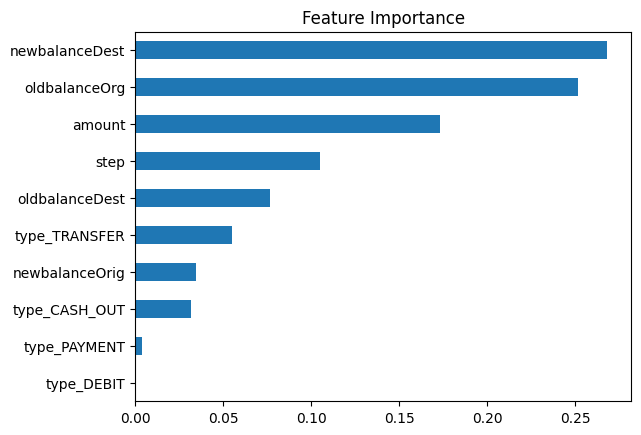

In [28]:
#Interpret Results
#Identify which features are most important
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title('Feature Importance')


In [37]:
# Show first 10 fraud detection results
results = X_test.copy()
results['Actual'] = y_test.values
results['Predicted'] = y_pred
results['Fraud_Detected'] = results['Predicted'].apply(lambda x: 'Fraud' if x == 1 else 'Not Fraud')
results[['Actual', 'Predicted', 'Fraud_Detected']].head(10)


,Actual,Predicted,Fraud_Detected
5345832,0,0,Not Fraud
1779998,0,0,Not Fraud
3114734,0,0,Not Fraud
622682,0,0,Not Fraud
5150856,0,0,Not Fraud
1531161,0,0,Not Fraud
2758709,0,0,Not Fraud
1411977,0,0,Not Fraud
2294864,0,0,Not Fraud
3109802,0,0,Not Fraud
